In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas
table1 = pandas.read_csv("customer_details.csv")
table2 = pandas.read_csv("customer_policy_details.csv")


In [3]:
table1.head(3)


,0,1,2,3,4,5,6,7
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes


In [4]:
table2.head(3)

,0,1,2,3,4
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0


In [5]:
table1_labels={'0':'customer_id', '1':'gender', '2':'age', '3':'driving_licence_presence',
'4':'region_code', '5':'previously_insured', '6':'vehicle_age', '7':'vehicle_damage'}


In [6]:
table1.isnull().sum()

0    386
1    368
2    368
3    393
4    392
5    381
6    381
7    407
dtype: int64

In [7]:
table1.dropna(subset=['0'],inplace=True)

In [8]:
for i in range(2,6):
    table1[str(i)].fillna(table1[str(i)].mean(),inplace=True)    

In [9]:
for i in [1,6,7]:
    table1[str(i)].fillna(table1[str(i)].mode()[0],inplace=True)

In [10]:
table2_labels={'0':'customer_id', '1':'annual_premium_INR', '2':'sales_channel_code', '3':'vintage',
'4':'response'}

In [11]:
for i in range(table2.shape[1]):
    print(f"number of cells of {table2_labels[str(i)]} with null values is {table2[str(i)].isnull().sum()}")


number of cells of customer_id with null values is 387
number of cells of annual_premium_INR with null values is 346
number of cells of sales_channel_code with null values is 400
number of cells of vintage with null values is 388
number of cells of response with null values is 361


In [12]:
table2.dropna(subset=['0'],inplace=True)
print(f"number of cells of {table1_labels[str(0)]} with null values = {table2[str(0)].isnull().sum()}")
 

number of cells of customer_id with null values = 0


In [13]:
for i in range(1,5):
    table2[str(i)].fillna(table2[str(i)].mean(),inplace=True)
    print(f"number of cells of {table2_labels[str(i)]} with null values = {table2[str(i)].isnull().sum()}")

number of cells of annual_premium_INR with null values = 0
number of cells of sales_channel_code with null values = 0
number of cells of vintage with null values = 0
number of cells of response with null values = 0


In [14]:
table1_limits = {}
for i in range(2,6):
    computations = table1[str(i)].describe(percentiles=[.25, .75])
    mean = computations.values[1]
    Q1 = computations.values[4] # 25%
    Q3 = computations.values[6] # 75%
    IQR = Q3-Q1
    ll = Q1 - 1.5*IQR # lower limit
    hl = Q3 + 1.5*IQR # higher limit
    table1_limits[str(i)] = (ll,hl)
table1_limits

{'2': (-11.0, 85.0), '3': (1.0, 1.0), '4': (-15.0, 65.0), '5': (-1.5, 2.5)}

In [15]:
table2_outliers = {'1':0, '2':0, '3':0, '4':0, '5':0}

In [16]:
table1_limits = {}
for i in range(2,6):
    computations = table1[str(i)].describe(percentiles=[.25, .75])
    mean = computations.values[1]
    Q1 = computations.values[4]
    Q3 = computations.values[6]
    IQR = Q3-Q1
    ll = Q1 - 1.5*IQR
    hl = Q3 + 1.5*IQR 
    table1_limits[str(i)] = (ll,hl)
table1_limits
 

table1_outliers = {'2':0, '3':0, '4':0, '5':0}

for j in table1.index:
    for i in range(2,6):
        if (table1_limits[str(i)][0]!=table1_limits[str(i)][1]) and (table1.loc[j, str(i)]>table1_limits[str(i)][1] or table1.loc[j, str(i)]<table1_limits[str(i)][0]):
            table1_outliers[str(i)]+=1

table1_outliers
for j in table1.index:
    for i in range(2,6):
        if table1.loc[j, str(i)]<table1_limits[str(i)][0]:
            table1.loc[j, str(i)]=table1[str(i)].mean()
        if table1.loc[j, str(i)]>table1_limits[str(i)][1]:
            table1.loc[j, str(i)]=table1[str(i)].mean()
 

In [17]:
table2_limits = {}

for i in range(1,5):
    computations = table2[str(i)].describe(percentiles=[.25, .75])
    mean = computations.values[1]
    Q1 = computations.values[4] # 25%
    Q3 = computations.values[6] # 75%
    IQR = Q3-Q1
    ll = Q1 - 1.5*IQR # lower limit
    hl = Q3 + 1.5*IQR # higher limit
    table2_limits[str(i)] = (ll,hl)
table2_limits
 

table2_outliers = {'1':0, '2':0, '3':0, '4':0, '5':0}

for j in table2.index:
    for i in range(1,5):
        if (table2_limits[str(i)][0]!=table2_limits[str(i)][1]) and (table2.loc[j, str(i)]>table2_limits[str(i)][1] or table2.loc[j, str(i)]<table2_limits[str(i)][0]):
            table2_outliers[str(i)]+=1

table2_outliers
for j in table2.index:
    for i in range(1,5):
        if table2.loc[j, str(i)]<table2_limits[str(i)][0]:
            table2.loc[j, str(i)]=table2[str(i)].mean()
        if table2.loc[j, str(i)]>table2_limits[str(i)][1]:
            table2.loc[j, str(i)]=table2[str(i)].mean()

In [18]:
table1.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
#table1['Gender']=table1['gender'].replace([0,1],['Female','Male'])
table1

,0,1,2,3,4,5,6,7
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
381104,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
381105,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
381106,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
381107,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


In [19]:
table2.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

,0,1,2,3,4
0,1.0,40454.0,26.0,217.0,0.122526
1,2.0,33536.0,26.0,183.0,0.000000
2,3.0,38294.0,26.0,27.0,0.122523
3,4.0,28619.0,152.0,203.0,0.000000
4,5.0,27496.0,152.0,39.0,0.000000
...,...,...,...,...,...
381104,381105.0,30170.0,26.0,88.0,0.000000
381105,381106.0,40016.0,152.0,131.0,0.000000
381106,381107.0,35118.0,160.0,161.0,0.000000
381107,381108.0,44617.0,124.0,74.0,0.000000


In [20]:
table1.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
table2.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
 

,0,1,2,3,4
0,1.0,40454.0,26.0,217.0,0.122526
1,2.0,33536.0,26.0,183.0,0.000000
2,3.0,38294.0,26.0,27.0,0.122523
3,4.0,28619.0,152.0,203.0,0.000000
4,5.0,27496.0,152.0,39.0,0.000000
...,...,...,...,...,...
381104,381105.0,30170.0,26.0,88.0,0.000000
381105,381106.0,40016.0,152.0,131.0,0.000000
381106,381107.0,35118.0,160.0,161.0,0.000000
381107,381108.0,44617.0,124.0,74.0,0.000000


In [21]:
table1.drop_duplicates(inplace=True)
# 2.6.2 dropping duplicate rows for table2
table2.drop_duplicates(inplace=True)

In [22]:
data = pandas.merge(table1, table2,on='0')
labels={'0':'customer_id', '1_x':'gender', '2_x':'age', '3_x':'driving_licence_presence',
'4_x':'region_code', '5':'previously_insured', '6':'vehicle_age', '7':'vehicle_damage',
'1_y':'annual_premium_INR', '2_y':'sales_channel_code', '3_y':'vintage', '4_y':'response'}
data.rename(columns=labels, inplace=True)
data.head(3)

,customer_id,gender,age,driving_licence_presence,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium_INR,sales_channel_code,vintage,response
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217.0,0.122526
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No,33536.0,26.0,183.0,0.000000
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27.0,0.122523


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380336 entries, 0 to 380335
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customer_id               380336 non-null  float64
 1   gender                    380336 non-null  object 
 2   age                       380336 non-null  float64
 3   driving_licence_presence  380336 non-null  float64
 4   region_code               380336 non-null  float64
 5   previously_insured        380336 non-null  float64
 6   vehicle_age               380336 non-null  object 
 7   vehicle_damage            380336 non-null  object 
 8   annual_premium_INR        380336 non-null  float64
 9   sales_channel_code        380336 non-null  float64
 10  vintage                   380336 non-null  float64
 11  response                  380336 non-null  float64
dtypes: float64(9), object(3)
memory usage: 37.7+ MB


In [24]:
data_cate_=data.select_dtypes("object").columns
data_cate_dummies=pd.get_dummies(data[data_cate_],drop_first=True)
data=pd.concat([data,data_cate_dummies],axis=1)
#data=data.drop(data_cate_,axis=1)


In [25]:
data

,customer_id,gender,age,driving_licence_presence,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium_INR,sales_channel_code,vintage,response,gender_Male,vehicle_age_< 1 Year,vehicle_age_> 2 Years,vehicle_damage_Yes
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217.0,0.122526,1,0,1,1
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No,33536.0,26.0,183.0,0.000000,1,0,0,0
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27.0,0.122523,1,0,1,1
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No,28619.0,152.0,203.0,0.000000,1,1,0,0
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No,27496.0,152.0,39.0,0.000000,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380331,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No,30170.0,26.0,88.0,0.000000,1,0,0,0
380332,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No,40016.0,152.0,131.0,0.000000,1,1,0,0
380333,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No,35118.0,160.0,161.0,0.000000,1,1,0,0
380334,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes,44617.0,124.0,74.0,0.000000,0,0,1,1


In [26]:
data.groupby('gender')['annual_premium_INR'].mean()


gender
Female    29256.646108
Male      29305.439528
Name: annual_premium_INR, dtype: float64

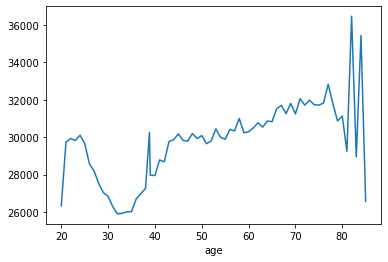

In [27]:
result4_2 = data.groupby('age')['annual_premium_INR'].mean()
import matplotlib.pyplot as pyplot
result4_2.plot()
pyplot.show()

In [28]:
print(f"male to female ration is {round(data['gender'].value_counts()[0]/data['gender'].value_counts()[1],2)}")
print(f"generally, the standard is: \n balanced data ratio: {50/50}\n slightly balanced data ratio: {round(55/45,2)}-{60/40} \n imbalanced data ratio: {80/20}-{90/10}")
 

male to female ration is 1.18
generally, the standard is: 
 balanced data ratio: 1.0
 slightly balanced data ratio: 1.22-1.5 
 imbalanced data ratio: 4.0-9.0


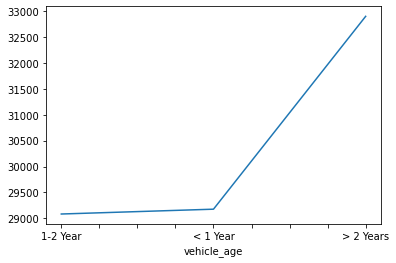

In [29]:
result4_4 = data.groupby('vehicle_age')['annual_premium_INR'].mean()
import matplotlib.pyplot as pyplot
result4_4.plot()
pyplot.show()
 

In [30]:
n = data['age'].corr(data['annual_premium_INR'])
if n<-0.5:
    print("Strong negative relationship")
if n>0.5:
    print("Strong positive relationship")
if n>-0.5 and n<0.5:
    print("There is no relationship!")


There is no relationship!
